In [1]:
import pandas as pd

In [86]:
import pandas as pd
from tqdm import tqdm
from nltk import word_tokenize
import nltk
from collections import Counter
import re
from kiwipiepy import Kiwi
from wordcloud import WordCloud
import matplotlib.pyplot as plt

nltk.download('punkt_tab')

[nltk_data] Downloading package punkt_tab to
[nltk_data]     C:\Users\lgdxschool2\AppData\Roaming\nltk_data...
[nltk_data]   Package punkt_tab is already up-to-date!


True

In [3]:
df = pd.read_csv('./data/문의합본최최최종.csv')
df.head()

,문의 내용
0,물빠지는곳이 있어야하나요?
1,타사 세탁기 위쪽에 설치하려고 하는데요.\n세탁기 상판사이즈가 680x640입니다....
2,통살균 기능이 장착된게 밎나요?\n그리고 \n콘덴서 자동 세척과 통살균은 다른 기능...
3,자동문열림기능이있는지요?
4,안녕하세요!\n1. FX25ENR 세탁기도 구매하려고 하는데 해당건조기 타워로 같이...


In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 6551 entries, 0 to 6550
Data columns (total 1 columns):
 #   Column  Non-Null Count  Dtype 
---  ------  --------------  ----- 
 0   문의 내용   6551 non-null   object
dtypes: object(1)
memory usage: 51.3+ KB


- 문의합본(쿠팡,11번가,GSSHOP) ==> 총 6551건

In [84]:
df_tolist = df.values.tolist()
df_tolist[:8]

[['물빠지는곳이 있어야하나요?'],
 ['타사 세탁기 위쪽에 설치하려고 하는데요.\n세탁기 상판사이즈가 680x640입니다.\n앵글 설치해서 해야될것 같은데 주문시 어떤 방법으로 주문해야 하나요.'],
 ['통살균 기능이 장착된게 밎나요?\n그리고 \n콘덴서 자동 세척과 통살균은 다른 기능인거죠?\n엘베없는 4층인데 사다리차 무상지원 가능한가요?'],
 ['자동문열림기능이있는지요?'],
 ['안녕하세요!\n1. FX25ENR 세탁기도 구매하려고 하는데 해당건조기 타워로 같이 올릴 수 있을까요?\n\n2. TV상품이라고 되어있는데 해당뜻이 뭔지 궁금합니다.'],
 ['에너지 효율 몇등급인가요?'],
 ['건조기는 실내 설치 가능하다고 들었는데   가능한거죠? '],
 ['배송설치시 집이 엘리베이터 없는 6층인대 사다리차 이용시 부담금이 있나요?']]

In [88]:
import numpy as np
df_tolist= np.array(df_tolist).flatten().tolist()
df_tolist[:8]

['물빠지는곳이 있어야하나요?',
 '타사 세탁기 위쪽에 설치하려고 하는데요.\n세탁기 상판사이즈가 680x640입니다.\n앵글 설치해서 해야될것 같은데 주문시 어떤 방법으로 주문해야 하나요.',
 '통살균 기능이 장착된게 밎나요?\n그리고 \n콘덴서 자동 세척과 통살균은 다른 기능인거죠?\n엘베없는 4층인데 사다리차 무상지원 가능한가요?',
 '자동문열림기능이있는지요?',
 '안녕하세요!\n1. FX25ENR 세탁기도 구매하려고 하는데 해당건조기 타워로 같이 올릴 수 있을까요?\n\n2. TV상품이라고 되어있는데 해당뜻이 뭔지 궁금합니다.',
 '에너지 효율 몇등급인가요?',
 '건조기는 실내 설치 가능하다고 들었는데   가능한거죠? ',
 '배송설치시 집이 엘리베이터 없는 6층인대 사다리차 이용시 부담금이 있나요?']

In [90]:
df_token = [token for doc in df_tolist for token in word_tokenize(doc)]
df_token[:8]

['물빠지는곳이', '있어야하나요', '?', '타사', '세탁기', '위쪽에', '설치하려고', '하는데요']

### 데이터 클렌징

In [93]:
p = re.compile("[!.,?;)(*:ㅡㅋㅎㅇㅠㅜ\\^~a-zA-Z]+")
df_clean = []

for doc in tqdm(df_token):
    if p.search(doc):
        continue
    df_clean.append(doc)

df_clean[:8]

100%|███████████████████████████████████████████████████████████████████████| 77268/77268 [00:00<00:00, 3310305.01it/s]


['물빠지는곳이', '있어야하나요', '타사', '세탁기', '위쪽에', '설치하려고', '하는데요', '세탁기']

In [96]:
from PIL import Image
from wordcloud import STOPWORDS, ImageColorGenerator

mask_sam = np.array(Image.open('./mask-cloud.png'))

wc = WordCloud(background_color='white', random_state=20, 
               mask = mask_sam, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_dict = {k:v for k,v in Counter(df_clean).most_common(70)}
freq_dict

{'설치': 563,
 '가능한가요': 482,
 '세탁기': 450,
 '안녕하세요': 435,
 '있나요': 398,
 '냉장고': 350,
 '가능할까요': 297,
 '되나요': 297,
 '어떻게': 281,
 '기존': 277,
 '혹시': 275,
 '건조기': 262,
 '수': 252,
 '따로': 243,
 '배송': 236,
 '그리고': 224,
 '궁금합니다': 208,
 '부탁드립니다': 198,
 '수거': 197,
 '이': 195,
 '있는데': 195,
 '있을까요': 185,
 '있는': 185,
 '오늘': 182,
 '폐가전': 181,
 '제품': 179,
 '하는데': 168,
 '지금': 157,
 '언제': 151,
 '설치가': 149,
 '구매': 136,
 '문의드립니다': 131,
 '위에': 130,
 '합니다': 121,
 '입니다': 118,
 '주문하면': 113,
 '-': 113,
 '하나요': 112,
 '아니면': 108,
 '현재': 108,
 '맞나요': 108,
 '될까요': 106,
 '문의': 104,
 '기존에': 104,
 '얼마나': 103,
 '상품': 103,
 '싶은데': 100,
 '벽걸이': 100,
 '없나요': 99,
 '있습니다': 98,
 '추가': 97,
 '알려주세요': 96,
 '가로': 93,
 '제가': 92,
 '잘': 91,
 '제품인가요': 88,
 '인가요': 86,
 '가능한지': 85,
 '사다리차': 83,
 '1': 83,
 '바로': 83,
 '다시': 83,
 '다른': 82,
 '2': 82,
 '다': 81,
 '드립니다': 80,
 '주문했는데': 80,
 '더': 80,
 '세탁기가': 79,
 '같이': 77}

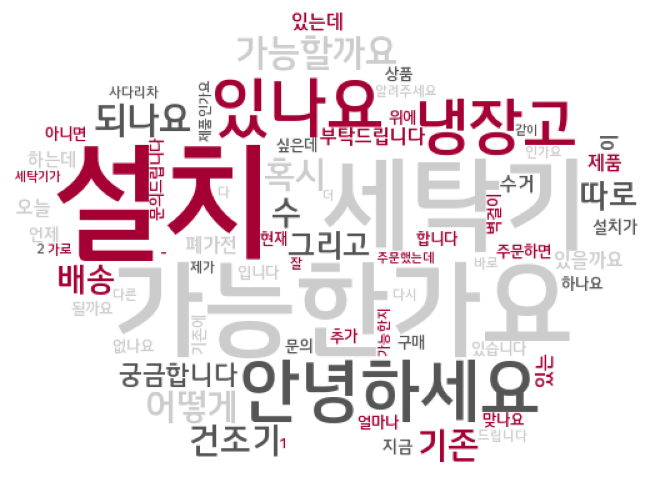

In [98]:
import random

def lg_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#A50034", "#555555", "#CCCCCC"]  # LG 전자 주요 색상 (빨강, 회색 계열)
    return random.choice(colors)

wc_rs = wc.generate_from_frequencies(freq_dict)

wc.recolor(color_func=lg_color_func)

plt.figure(figsize=(16,6))
plt.imshow(wc_rs)
plt.axis('off')
plt.show()

In [100]:
count_word_df = pd.DataFrame(list(freq_dict.items()), columns=['Word', 'Frequency'])
count_word_df

,Word,Frequency
0,설치,563
1,가능한가요,482
2,세탁기,450
3,안녕하세요,435
4,있나요,398
...,...,...
65,드립니다,80
66,주문했는데,80
67,더,80
68,세탁기가,79


In [112]:
count_word_df.iloc[:40]

,Word,Frequency
0,설치,563
1,가능한가요,482
2,세탁기,450
3,안녕하세요,435
4,있나요,398
5,냉장고,350
6,가능할까요,297
7,되나요,297
8,어떻게,281
9,기존,277


## 형태소 - 명사만 추출

In [115]:
from kiwipiepy import Kiwi
Kiwi = Kiwi()

In [123]:
qna_clean_morphs = [] # 전체리스트 생성

for doc in tqdm(df_clean):
    doc_merge = ''.join(doc)
    doc_merphs = Kiwi.tokenize(doc_merge)  
    morphs_list = []
    for t in doc_merphs:
        if t.tag in "NNG": # 일반명사, 동사, 형용사만 추출
            if len(t.form) > 1:
                morphs_list.append(t.form)
    qna_clean_morphs.append(' '.join(morphs_list))

100%|█████████████████████████████████████████████████████████████████████████| 62178/62178 [00:03<00:00, 16053.26it/s]


In [125]:
qna_clean_morphs[:8]

['', '', '타사', '세탁기', '위쪽', '설치', '', '세탁기']

In [127]:
qna_clean2 = ' '.join(qna_clean_morphs).split()
qna_clean2[:8]

['타사', '세탁기', '위쪽', '설치', '세탁기', '상판', '사이즈', '앵글']

In [131]:
len(qna_clean2)

39588

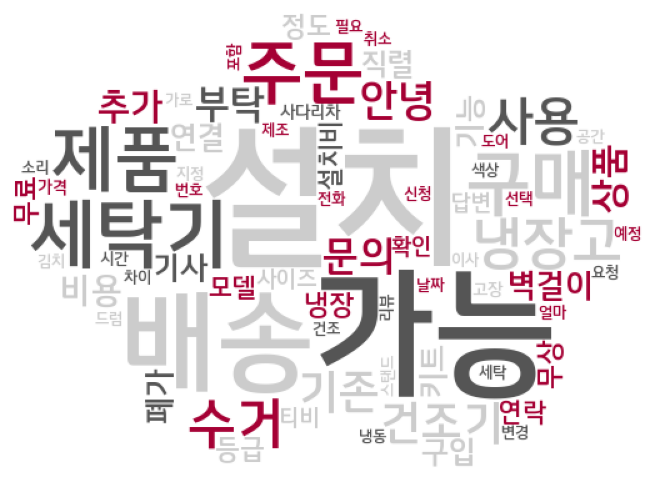

In [133]:
mask_sam = np.array(Image.open('./mask-cloud.png'))

wc = WordCloud(background_color='white', random_state=20, 
               mask = mask_sam, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_dict = {k:v for k,v in Counter(qna_clean2).most_common(70)}
wc_rs = wc.generate_from_frequencies(freq_dict)

wc.recolor(color_func=lg_color_func)

plt.figure(figsize=(16,6))
plt.imshow(wc_rs)
plt.axis('off')
plt.show()

In [139]:
count_word_df2 = pd.DataFrame(list(freq_dict.items()), columns=['Word', 'Frequency'])
count_word_df2

,Word,Frequency
0,설치,2172
1,가능,1793
2,배송,1028
3,세탁기,985
4,구매,919
...,...,...
65,드럼,99
66,도어,99
67,선택,98
68,이사,95


In [145]:
word_top40 = count_word_df2[:40]

In [147]:
word_top40.to_csv("word_top40_태블로용2.csv", encoding='euc-kr')

----

In [66]:
Reason_return = df[df['문의 내용'].str.contains("반품|크기|사이즈")]
Reason_return.reset_index(drop=True, inplace=True)
pd.set_option('display.max_colwidth', None)
Reason_return

,문의 내용
0,타사 세탁기 위쪽에 설치하려고 하는데요.\n세탁기 상판사이즈가 680x640입니다.\n앵글 설치해서 해야될것 같은데 주문시 어떤 방법으로 주문해야 하나요.
1,제품 크기가 어디쯤 나와 있을까요?
2,사이즈문의\n건조기 폭이 700인데 들어갈곳 문열고 사이즈재니 650정도 되는데 못들어 가겠죠? 혹 방법이 있는지 궁금하네요
3,현관문 사이즈 800되는데 들어올수 없겠죠? 사다리차도 안되는 위치라서요
4,똑같은 상품인데 19kg랑 23kg랑 크기차이만 있는건가요? 기능차이도 있는건가요?
...,...
269,해당 상품 구매하려고 하는데요. 혹시 설치 불가 판정이 나와서 반품해야 하는 상황이 오면 추가로 비용이 청구되는 것이 있나요?
270,해당 상품 구매하려고 하는데요. 혹시 설치 불가 판정이 나와서 반품해야 하는 상황이 오면 추가로 비용이 청구되는 것이 있나요?
271,"건조기 크기(가로,높이,폭) 19~21Kg는 다 똑같나요? 물받이가 따로 내장되어 있을까요? 배수관 없는 실내에 설치 하려는데요"
272,실측 사이즈는 어떻게 되나요? 베란다가 협소해서요 또 수도꼭지랑 연결되야 되는건가요? 방에도 설치 가능한걸로 알고 있는데요


In [70]:
Reason_return[Reason_return['문의 내용'].str.contains("반품.*(크기|사이즈)", regex=True)]

C:\Users\lgdxschool2\AppData\Local\Temp\ipykernel_14532\3575559225.py:1: UserWarning: This pattern is interpreted as a regular expression, and has match groups. To actually get the groups, use str.extract.
  Reason_return[Reason_return['문의 내용'].str.contains("반품.*(크기|사이즈)", regex=True)]


,문의 내용
115,반품문의드립니다 냉장고장 사이즈가 안맞아서요


In [203]:
re_df = Reason_return[Reason_return['문의 내용'].str.contains("반품", regex=True)]
re_df

,문의 내용
10,구매후에 설치 장소에 설치 불가할때 반품이 가능한가요?
17,현재 벽걸이사용중인데 벽걸이로 주문헤서\n기존 브로캣사용가능하면 가격이 똑같은가요?\n다른곳은 일단 벽걸이로 주문하고 기사님설치시\n기존 브로캣에 설치가능하면 부분반품이된다해서\n문의합니다 그런데 여기는 벽걸이추가비용없이 벽걸이나 스탠드나 가격도 똑같네요\n가격이 똑같네요?
31,안녕하세요\n제품이가격이저렴하고좋은데혹시전시제품이나반품제품인지궁금합니다\n그리고설치비용이발생하는건지도궁금하고\n모델이작년모덜인지궁금합니다
52,안녕하세요\n제품이가격이저렴하고좋은데혹시전시제품이나반품제품인지궁금합니다\n그리고설치비용이발생하는건지도궁금하고\n모델이작년모덜인지궁금합니다
67,구매를했는데 반품도 안했는데 반품했다고 되있어서요\n판매자측에서 취소를 하신건가요? 완전히 주문취소가된건가요?\n반품절차 그대로 반품할게요!
69,설치가 가능한지 문의하고 싶은데 어디로 문의하면 될까요?\n이사가는 장소에 설치할건데 그곳이 거실과 베란다를 확장해서 설치장소가 실내처럼 보이거든요?\n주문후 설치기사님이 오셔서 장소 확인했는데 설치 불가하면 무료반품이 된다는건가요?
70,"지금있는 세탁기가 8년정도된 LG 통돌이 10Kg짜리 인데요~\n시중에 판매되는 16kg통돌이와 거의 크기가 비슷해서 구매하려 합니다.\n아파트 베란다 설치공간이 좁아서 지금 구매하려는 제품이 크기가 맞을지 걱정되어 문의드립니다.\n측정은 해봤는데 가로 63cm정도 되던에 혹시 맞지 않을경우 바로 반품이 가능할까요?\n그리고 수거와 설치는 제가 원하는 날에 가능한지도 궁금합니다.(토,일에 가능)\n답변 부탁드립니다. 수고하세요~"
72,폐시탁기회수해주시나요?\n세탁실입구가60 cm인데\n설치는가능한지요\n설치불가능시에반품비있나요?
73,화장실 문이 작은데 방문시 설치 불가능하면 취소 가능한가요?\n반품비용이 따로 있나요?
78,세탁2번했어요구매한지 얼마안됬구요 작동이 탈수가안되구요 다시 물이나오고 반품해야하나 어떻게 해야할지 빠른답변주세요


In [205]:
re_df_tolist= np.array(re_df).flatten().tolist()
re_df_tolist[:8]

['구매후에 설치 장소에 설치 불가할때 반품이 가능한가요?',
 '현재 벽걸이사용중인데  벽걸이로 주문헤서\n기존 브로캣사용가능하면  가격이 똑같은가요?\n다른곳은 일단 벽걸이로 주문하고 기사님설치시\n기존 브로캣에 설치가능하면  부분반품이된다해서\n문의합니다 그런데 여기는 벽걸이추가비용없이  벽걸이나 스탠드나 가격도 똑같네요\n가격이 똑같네요?',
 '안녕하세요\n제품이가격이저렴하고좋은데혹시전시제품이나반품제품인지궁금합니다\n그리고설치비용이발생하는건지도궁금하고\n모델이작년모덜인지궁금합니다',
 '안녕하세요\n제품이가격이저렴하고좋은데혹시전시제품이나반품제품인지궁금합니다\n그리고설치비용이발생하는건지도궁금하고\n모델이작년모덜인지궁금합니다',
 '구매를했는데 반품도 안했는데 반품했다고 되있어서요\n판매자측에서 취소를 하신건가요? 완전히 주문취소가된건가요?\n반품절차 그대로 반품할게요!',
 '설치가 가능한지 문의하고 싶은데 어디로 문의하면 될까요?\n이사가는 장소에 설치할건데 그곳이 거실과 베란다를 확장해서 설치장소가 실내처럼 보이거든요?\n주문후 설치기사님이 오셔서 장소 확인했는데 설치 불가하면 무료반품이 된다는건가요?',
 '지금있는 세탁기가 8년정도된 LG 통돌이 10Kg짜리 인데요~\n시중에 판매되는 16kg통돌이와 거의 크기가 비슷해서 구매하려 합니다.\n아파트 베란다 설치공간이 좁아서 지금 구매하려는 제품이 크기가 맞을지 걱정되어 문의드립니다.\n측정은 해봤는데 가로 63cm정도 되던에 혹시 맞지 않을경우 바로 반품이 가능할까요?\n그리고 수거와 설치는 제가 원하는 날에 가능한지도 궁금합니다.(토,일에 가능)\n답변 부탁드립니다. 수고하세요~',
 '폐시탁기회수해주시나요?\n세탁실입구가60 cm인데\n설치는가능한지요\n설치불가능시에반품비있나요?']

In [217]:
qna_clean_morphs = [] # 전체리스트 생성

for doc in tqdm(df_token):
    doc_merge = ''.join(doc)
    doc_merphs = Kiwi.tokenize(doc_merge)  
    morphs_list = []
    for t in doc_merphs:
        if t.tag in ["NNG"]: # 일반명사, 동사, 형용사만 추출
            if len(t.form) > 1:
                morphs_list.append(t.form)
    qna_clean_morphs.append(' '.join(morphs_list))

100%|█████████████████████████████████████████████████████████████████████████| 77268/77268 [00:04<00:00, 18381.19it/s]


In [223]:
token_list_morphs = [t for doc in qna_clean_morphs for t in word_tokenize(doc)]
counter_morphs = Counter(token_list_morphs)

freq_dict = {k:v for k,v in counter_morphs.most_common(70)}
freq_dict

{'설치': 2189,
 '가능': 1819,
 '배송': 1057,
 '세탁기': 1024,
 '구매': 928,
 '제품': 904,
 '주문': 848,
 '냉장고': 771,
 '수거': 707,
 '사용': 662,
 '건조기': 535,
 '기존': 525,
 '안녕': 474,
 '문의': 417,
 '부탁': 404,
 '상품': 390,
 '추가': 341,
 '비용': 316,
 '벽걸이': 285,
 '기사': 281,
 '연결': 277,
 '폐가': 256,
 '구입': 250,
 '기능': 248,
 '키트': 247,
 '직렬': 234,
 '정도': 226,
 '무상': 211,
 '냉장': 202,
 '등급': 199,
 '무료': 198,
 '모델': 183,
 '연락': 179,
 '설치비': 173,
 '사이즈': 171,
 '티비': 168,
 '확인': 166,
 '답변': 163,
 '사다리차': 162,
 '고장': 161,
 '가격': 160,
 '가로': 154,
 '건조': 151,
 '필요': 142,
 '냉동': 140,
 '차이': 138,
 '지정': 137,
 '전화': 137,
 '포함': 136,
 '날짜': 134,
 '변경': 130,
 '얼마': 129,
 '스탠드': 128,
 '시간': 123,
 '색상': 121,
 '소리': 116,
 '제조': 115,
 '예정': 114,
 '공간': 114,
 '취소': 114,
 '리뷰': 112,
 '세탁': 112,
 '기간': 112,
 '신청': 111,
 '김치': 108,
 '드럼': 107,
 '번호': 106,
 '선택': 100,
 '도어': 99,
 '이사': 97}

In [229]:
count_word_re = pd.DataFrame(list(freq_dict.items()), columns=['Word', 'Frequency'])
count_word_re

,Word,Frequency
0,설치,2189
1,가능,1819
2,배송,1057
3,세탁기,1024
4,구매,928
...,...,...
65,드럼,107
66,번호,106
67,선택,100
68,도어,99


In [235]:
count_word_re_top40 = count_word_re[:40]

In [237]:
count_word_re_top40.to_csv("반품사유_태블로용3.csv", encoding='euc-kr')

In [ ]:
token_list_morphs = [t for doc in qna_clean_morphs for t in word_tokenize(doc)]
counter_morphs = Counter(token_list_morphs)

wc = WordCloud(background_color='white', random_state=20, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_dict = {k:v for k,v in counter_morphs.most_common(70)}
freq_dict

In [80]:
Reason_return[Reason_return['문의 내용'].str.contains("반품|사이즈", regex=True)].head(10)

,문의 내용
0,타사 세탁기 위쪽에 설치하려고 하는데요.\n세탁기 상판사이즈가 680x640입니다.\n앵글 설치해서 해야될것 같은데 주문시 어떤 방법으로 주문해야 하나요.
2,사이즈문의\n건조기 폭이 700인데 들어갈곳 문열고 사이즈재니 650정도 되는데 못들어 가겠죠? 혹 방법이 있는지 궁금하네요
3,현관문 사이즈 800되는데 들어올수 없겠죠? 사다리차도 안되는 위치라서요
6,세탁실이좁은데 16키로 쓰는데 19키로랑 사이즈가 높이빼고 같은거맞는거죠?
7,베란다에 설치하려는데 턱있는곳이고 폭이73인데\n사이즈를보니 폭이77되는것같은데 설치가 불가능할까요?
8,"킹사이즈 극세사 이불 세탁할 정도의 용량이 될까요?\n저희집에 다용도실, 베란다가 없는데 설치 가능할까요?"
10,구매후에 설치 장소에 설치 불가할때 반품이 가능한가요?
12,가로 세로 사이즈 알려 주세요~
13,이불 더블사이즈의 세탁이 가능한가요?
14,세탁기 깊이가 벽면에서 840 정도 됩니다.\n이 이상되면 세탁실 문이 안 닫쳐요.\n사이즈가 맞나요???


In [82]:
Reason_return[Reason_return['문의 내용'].str.contains("반품|문의", regex=True)].head(20)

,문의 내용
2,사이즈문의\n건조기 폭이 700인데 들어갈곳 문열고 사이즈재니 650정도 되는데 못들어 가겠죠? 혹 방법이 있는지 궁금하네요
10,구매후에 설치 장소에 설치 불가할때 반품이 가능한가요?
17,현재 벽걸이사용중인데 벽걸이로 주문헤서\n기존 브로캣사용가능하면 가격이 똑같은가요?\n다른곳은 일단 벽걸이로 주문하고 기사님설치시\n기존 브로캣에 설치가능하면 부분반품이된다해서\n문의합니다 그런데 여기는 벽걸이추가비용없이 벽걸이나 스탠드나 가격도 똑같네요\n가격이 똑같네요?
23,"안녕하세요\n현재 플렉스워시 세탁기(686x864)를 사용중인데 옆쪽으로 병렬진열이 가능한지 문의드립니다.\n다용도실 크기 넓이 160, 폭92 입니다."
30,"건조기 제원이 안나와있어서 문의 드립니다\n크기 제원 너비,깊이,높이 문의드립니다."
31,안녕하세요\n제품이가격이저렴하고좋은데혹시전시제품이나반품제품인지궁금합니다\n그리고설치비용이발생하는건지도궁금하고\n모델이작년모덜인지궁금합니다
44,"안녕하세요\n현재 플렉스워시 세탁기(686x864)를 사용중인데 옆쪽으로 병렬진열이 가능한지 문의드립니다.\n다용도실 크기 넓이 160, 폭92 입니다."
51,"건조기 제원이 안나와있어서 문의 드립니다\n크기 제원 너비,깊이,높이 문의드립니다."
52,안녕하세요\n제품이가격이저렴하고좋은데혹시전시제품이나반품제품인지궁금합니다\n그리고설치비용이발생하는건지도궁금하고\n모델이작년모덜인지궁금합니다
67,구매를했는데 반품도 안했는데 반품했다고 되있어서요\n판매자측에서 취소를 하신건가요? 완전히 주문취소가된건가요?\n반품절차 그대로 반품할게요!


In [149]:
Reason_return[Reason_return['문의 내용'].str.contains("사이즈|문의", regex=True)].head(20)

,문의 내용
0,타사 세탁기 위쪽에 설치하려고 하는데요.\n세탁기 상판사이즈가 680x640입니다.\n앵글 설치해서 해야될것 같은데 주문시 어떤 방법으로 주문해야 하나요.
2,사이즈문의\n건조기 폭이 700인데 들어갈곳 문열고 사이즈재니 650정도 되는데 못들어 가겠죠? 혹 방법이 있는지 궁금하네요
3,현관문 사이즈 800되는데 들어올수 없겠죠? 사다리차도 안되는 위치라서요
6,세탁실이좁은데 16키로 쓰는데 19키로랑 사이즈가 높이빼고 같은거맞는거죠?
7,베란다에 설치하려는데 턱있는곳이고 폭이73인데\n사이즈를보니 폭이77되는것같은데 설치가 불가능할까요?
8,"킹사이즈 극세사 이불 세탁할 정도의 용량이 될까요?\n저희집에 다용도실, 베란다가 없는데 설치 가능할까요?"
12,가로 세로 사이즈 알려 주세요~
13,이불 더블사이즈의 세탁이 가능한가요?
14,세탁기 깊이가 벽면에서 840 정도 됩니다.\n이 이상되면 세탁실 문이 안 닫쳐요.\n사이즈가 맞나요???
15,문 폭사이즈가 69정도 되는데 가능한가요?\n화장실에 설치할건데..혹시 밑에 받침대 구매도 될까요? 물사용도 많고 부식우려도 있고 해서요


#### 결론 : 설치 가능한지가 해결되면 문의글이 줄어들 것이라 예상됨

- 효과
  - 예측 임의 데이터로 작성함

In [303]:
effect = pd.DataFrame([[1819,1057,2189],[1000,750,1222]], columns=["가능","배송","설치"], index=['현재 문의','예상 문의'])

In [305]:
effect

,가능,배송,설치
현재 문의,1819,1057,2189
예상 문의,1000,750,1222


In [329]:
effect.mean(axis=1)

현재 문의    1688.333333
예상 문의     990.666667
dtype: float64

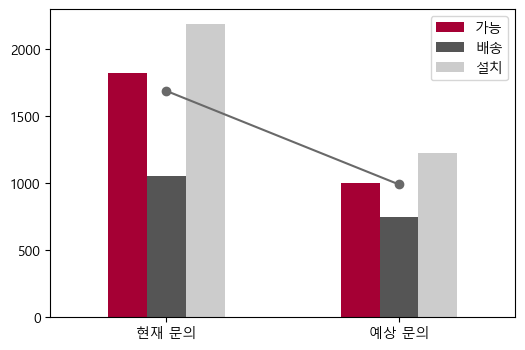

In [379]:
import matplotlib.pyplot as plt
plt.rc('font', family='Malgun Gothic')

effect[["가능","배송","설치"]].plot(kind='bar',color=["#A50034", "#555555", "#CCCCCC"], rot=0, figsize=(6,4))
plt.plot(effect.index, effect.mean(axis=1), color='dimgrey', linestyle='-', marker='o')

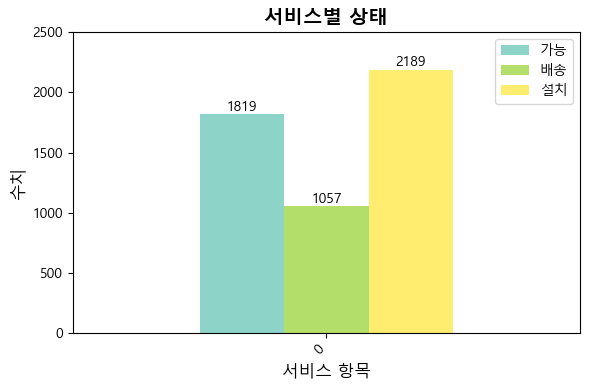

In [295]:
import pandas as pd
import matplotlib.pyplot as plt

# 데이터프레임 생성
curr = pd.DataFrame([[1819, 1057, 2189]], columns=["가능", "배송", "설치"])

# 스타일 설정
plt.rc('font', family='Malgun Gothic')  # 한글 폰트 설정

# 그래프 그리기
ax = curr[["가능", "배송", "설치"]].plot(kind='bar', colormap='Set3', rot=45, figsize=(6, 4))

# 제목 및 레이블 추가
ax.set_title('서비스별 상태', fontsize=14, fontweight='bold')  # 제목 설정
ax.set_xlabel('서비스 항목', fontsize=12)  # X축 레이블 설정
ax.set_ylabel('수치', fontsize=12)  # Y축 레이블 설정

# Y축의 값 범위 설정
ax.set_ylim(0, 2500)

# 그래프의 각 막대에 값 표시
for p in ax.patches:
    ax.annotate(f'{p.get_height()}', 
                (p.get_x() + p.get_width() / 2., p.get_height()), 
                ha='center', va='center', 
                fontsize=10, color='black', 
                xytext=(0, 5), textcoords='offset points')

# X축 레이블 회전
ax.set_xticklabels(ax.get_xticklabels(), rotation=45, ha='right')

# 그래프 보이기
plt.tight_layout()  # 그래프 요소들이 겹치지 않도록 자동 조정
plt.show()


---

-----

## 리뷰 데이터 살펴보기

In [242]:
df = pd.read_csv('./data/합친_file_리뷰.csv')
df.head()

,Unnamed: 0,Review
0,0.0,#삼성전자 이벤트 참여 재고가 없어서 배송이 조금 늦어지긴 했지만 배송시간 잘 지켜주시고 설치 잘 해주시는걸 보니 역시 삼성이다 했어요. 폐가전 치워가는 카펫과 새제품 들여오는 카펫을 바꾸시는 세심함에 놀랐습니다. 설치기사님들 친절하시고 폐가전 잘 치워주시고 수평 잘 잡아주시고 마무리 정리까지 기분좋게 설치해주셨습니다. 색상도 마음에 들고 1등급인게 제 일 마음에 들어요 저는 키친핏을 고민하면서 냉동실용량에 대해 제일 고민했고 김치냉장고를 같이 구매해서 상칸을 냉동실로 쓰기로 했어요. 냉장고에 있는 냉동실 한칸은 살얼음모드로 사 용하구요. 오늘 첫날이라 잘 모르겠지만 만족스러울 것 같습니다. 아 한가지 건의사항 키친핏으로 두대를 연결할 때 페어키트 따로 주문해야 합니다. 그것때문에 배송안맞아 고생했습니다~
1,1.0,냉장고 고장으로 구매를 고려하던 중 기존 사용하던 삼성냉장고의 내구성과 사용 의 편리함을 고려하여 결정했습니다. 색상이 예쁘고 사용하기 편리해서 좋습니다. 한가지 아쉬운점은 2 등급이고 용량이 작은데도 불구하고 용량이 큰 비스포크 제품보다 가격이 비싼게 아쉽습니다. 그거 빼곤 만족합니다. 냉장고 바꿀 계획 있으신분들 추천드립니다.
2,2.0,"우리나라 가전 1위 업체인 삼성전자의 제품이라 제품에 대한 안정성, 신뢰성, 안전성 등이 확보되어 있을거라 기대했습니다. 그런데 설치한 날부터 요란한 소리가 나더라구요. 첨엔 소리 날 수 있겠지 싶었습니다. 그런데 쇠구슬과같은 커다란 금속물체로 온갖걸 다 때려 부수는 소리가 하루에도 여러번 시도때도없이 납니다. 혼자 있을때 소리 나면 진짜 기겁을 합니다. 외출할때, 잘때 녹음을 떠놓고 기사님 불러 들려드렸더니 교체대상이랍니다. 이런 소리는 절대 나서는 안된다고 합니다. 교환 신청하고 일정맞춰 교체받았는데 똑같은 소리가 또 납니다. 하....다른 분들은 이상한 소리가 안나는건지 무시하고 쓰시는건지 모르겠지만.. 왜 저희만 이런 일이 생기는건지 미치겠습니다. 주요 부품의 특정 로트에서 문제가 있는건지, 특정 생산 배치에서 문제가 있는건지 아니면 애초에 양산성이 확보가 되지 않은채 출시된건지... 제대로된 정보를 받고 싶습니다. 오늘 기사님 또 오시는데 동일모델 교체, 다른모델교체, 환불 선택하라 하시 겠죠. 저는 이런것보다 근본적인 원인과 해결책에 대해 알고싶습니다."
3,3.0,"아담한 저의 체구로 인한 짧은 팔다리를 고려 할 때 깊이가 깊은 대용량 냉장고 보다 키친핏! 엄만 냉장고는 무조건 커야 한다고 하셨지만 옛날과 달리 필요하면 새벽배송에 김치냉장고 도 있는데 많이 쟁여 놓고 살 필요가 없으니 키친핏! 주방 인테리어를 생각 해도 키친핏! 그래서 선택하게 된 2024년형 비스포크 키친핏 냉장고 배송도 원하는 날짜에 정확히 삼성기사님 두 분이 오셔서 설치, 설명 해 주시고 주변 정리까지 완벽하게 해 주심 냉장고는 나무랄 데가 없는데 다만 도어를 닫을 때 확실히 끝까지 밀어야 한다는거 전에 쓰던 냉장고가 스르르 그냥 닫히는 스타일이 였어서 좀 적응 시간이 걸릴 듯 하다 아직은 의식 하며 문을 꼭 닫게 되는데 곧 무의식적으로도 잘 닫게 되겠지 냉장고 새식구 들이니 주부라고 주방일이 더 즐겁다 오랫동안 함께 하기를 기대 해 본다"
4,4.0,매장에서 새틴 코타 글램 등의 소재를 직접 확인해보고 새틴으로 구매했습니다. 무광이 주는 고급스러움이 꽤나 만족스러워요. 아래칸 우측은 맞춤설정이 가능해서 2인 가족인 저희는 김치냉장고 모드로 설정해놓았는데 음료수가 굉장히 시원하고 좋네요..ㅎㅎㅎ 키친핏이라 용량이 작진 않을까 걱정했는데 여유롭고 좋습니다. 색상도 예뻐서 어느집에 들여도 잘 어울릴 것 같아요~ 삼성최고


In [154]:
df.columns

Index(['Unnamed: 0', 'Review'], dtype='object')

In [244]:
df.drop(columns=['Unnamed: 0'], inplace=True)
df.head(2)

,Review
0,#삼성전자 이벤트 참여 재고가 없어서 배송이 조금 늦어지긴 했지만 배송시간 잘 지켜주시고 설치 잘 해주시는걸 보니 역시 삼성이다 했어요. 폐가전 치워가는 카펫과 새제품 들여오는 카펫을 바꾸시는 세심함에 놀랐습니다. 설치기사님들 친절하시고 폐가전 잘 치워주시고 수평 잘 잡아주시고 마무리 정리까지 기분좋게 설치해주셨습니다. 색상도 마음에 들고 1등급인게 제 일 마음에 들어요 저는 키친핏을 고민하면서 냉동실용량에 대해 제일 고민했고 김치냉장고를 같이 구매해서 상칸을 냉동실로 쓰기로 했어요. 냉장고에 있는 냉동실 한칸은 살얼음모드로 사 용하구요. 오늘 첫날이라 잘 모르겠지만 만족스러울 것 같습니다. 아 한가지 건의사항 키친핏으로 두대를 연결할 때 페어키트 따로 주문해야 합니다. 그것때문에 배송안맞아 고생했습니다~
1,냉장고 고장으로 구매를 고려하던 중 기존 사용하던 삼성냉장고의 내구성과 사용 의 편리함을 고려하여 결정했습니다. 색상이 예쁘고 사용하기 편리해서 좋습니다. 한가지 아쉬운점은 2 등급이고 용량이 작은데도 불구하고 용량이 큰 비스포크 제품보다 가격이 비싼게 아쉽습니다. 그거 빼곤 만족합니다. 냉장고 바꿀 계획 있으신분들 추천드립니다.


In [246]:
import numpy as np
df_tolist= np.array(df_tolist).flatten().tolist()
df_tolist[:8]

['물빠지는곳이 있어야하나요?',
 '타사 세탁기 위쪽에 설치하려고 하는데요.\n세탁기 상판사이즈가 680x640입니다.\n앵글 설치해서 해야될것 같은데 주문시 어떤 방법으로 주문해야 하나요.',
 '통살균 기능이 장착된게 밎나요?\n그리고 \n콘덴서 자동 세척과 통살균은 다른 기능인거죠?\n엘베없는 4층인데 사다리차 무상지원 가능한가요?',
 '자동문열림기능이있는지요?',
 '안녕하세요!\n1. FX25ENR 세탁기도 구매하려고 하는데 해당건조기 타워로 같이 올릴 수 있을까요?\n\n2. TV상품이라고 되어있는데 해당뜻이 뭔지 궁금합니다.',
 '에너지 효율 몇등급인가요?',
 '건조기는 실내 설치 가능하다고 들었는데   가능한거죠? ',
 '배송설치시 집이 엘리베이터 없는 6층인대 사다리차 이용시 부담금이 있나요?']

In [248]:
len(df_tolist)

6551

In [250]:
df_token = [token for doc in df_tolist for token in word_tokenize(doc)]
df_token[:8]

['물빠지는곳이', '있어야하나요', '?', '타사', '세탁기', '위쪽에', '설치하려고', '하는데요']

In [252]:
from kiwipiepy import Kiwi
Kiwi = Kiwi()

In [253]:
qna_clean_morphs = [] # 전체리스트 생성

for doc in tqdm(df_token):
    doc_merge = ''.join(doc)
    doc_merphs = Kiwi.tokenize(doc_merge)  
    morphs_list = []
    for t in doc_merphs:
        if t.tag in ["NNG","VV","VA"]: # 일반명사, 동사, 형용사만 추출
            if len(t.form) > 1:
                morphs_list.append(t.form)
    qna_clean_morphs.append(' '.join(morphs_list))

100%|█████████████████████████████████████████████████████████████████████████| 77268/77268 [00:05<00:00, 14612.78it/s]


In [255]:
qna_clean_morphs[:8]

['빠지', '', '', '타사', '세탁기', '위쪽', '설치', '']

In [256]:
qna_clean3 = ' '.join(qna_clean_morphs).split()
qna_clean3[:8]

['빠지', '타사', '세탁기', '위쪽', '설치', '세탁기', '상판', '사이즈']

In [257]:
len(qna_clean_morphs)

77268

In [258]:
token_list_morphs = [t for doc in qna_clean_morphs for t in word_tokenize(doc)]
counter_morphs = Counter(token_list_morphs)

wc = WordCloud(background_color='white', random_state=20, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')
freq_dict = {k:v for k,v in counter_morphs.most_common(60)}
freq_dict

{'설치': 2246,
 '가능': 1819,
 '배송': 1057,
 '세탁기': 1024,
 '구매': 928,
 '제품': 904,
 '주문': 848,
 '냉장고': 771,
 '드리': 755,
 '수거': 707,
 '사용': 662,
 '건조기': 535,
 '기존': 525,
 '안녕': 474,
 '문의': 417,
 '부탁': 404,
 '상품': 390,
 '추가': 341,
 '비용': 316,
 '궁금하': 292,
 '벽걸이': 285,
 '기사': 281,
 '나오': 277,
 '연결': 277,
 '폐가': 256,
 '구입': 250,
 '기능': 248,
 '키트': 247,
 '직렬': 234,
 '정도': 226,
 '무상': 211,
 '올리': 209,
 '냉장': 202,
 '등급': 199,
 '무료': 198,
 '모델': 183,
 '연락': 179,
 '설치비': 173,
 '사이즈': 171,
 '알리': 171,
 '티비': 168,
 '확인': 166,
 '답변': 163,
 '사다리차': 162,
 '고장': 161,
 '가격': 160,
 '가로': 154,
 '빠르': 153,
 '들어가': 153,
 '건조': 151,
 '필요': 142,
 '냉동': 140,
 '차이': 139,
 '지정': 137,
 '전화': 137,
 '포함': 136,
 '날짜': 134,
 '변경': 130,
 '얼마': 129,
 '스탠드': 128}

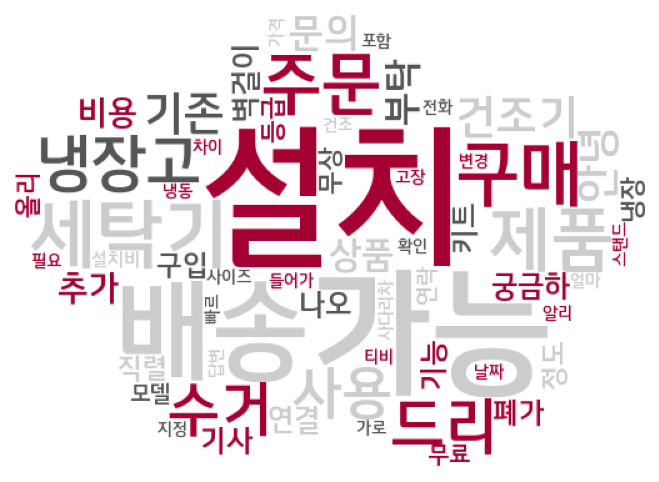

In [263]:
import random

wc = WordCloud(background_color='white', random_state=20, 
               mask = mask_sam, font_path='C://Windows/Fonts/LG_Smart_UI-SemiBold.ttf')

def lg_color_func(word, font_size, position, orientation, random_state=None, **kwargs):
    colors = ["#A50034", "#555555", "#CCCCCC"]  # LG 전자 주요 색상 (빨강, 회색 계열)
    return random.choice(colors)

wc_rs = wc.generate_from_frequencies(freq_dict)

wc.recolor(color_func=lg_color_func)

plt.figure(figsize=(16,6))
plt.imshow(wc_rs)
plt.axis('off')
plt.show()

In [266]:
count_word_review = pd.DataFrame(list(freq_dict.items()), columns=['Word', 'Frequency'])
count_word_review

,Word,Frequency
0,설치,2246
1,가능,1819
2,배송,1057
3,세탁기,1024
4,구매,928
5,제품,904
6,주문,848
7,냉장고,771
8,드리,755
9,수거,707


In [270]:
review_word_top40 = count_word_review[:40]

In [272]:
review_word_top40.to_csv("리뷰_word_top40태블로용4.csv", encoding='euc-kr')